                                                **CLUSTERING ANALYSIS **

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms



**Objective**:
The objective of this assignment is to introduce various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


In [ ]:
#Loading data

In [2]:
import pandas as pd
data = pd.read_excel('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\EastWestAirlines.xlsx',header=1)
print(data)

   flying patterns, earning and use of frequent flyer rewards, and use of the airline credit  \
0   card.  The task is to identify customer segmen...                                          
1                                                 NaN                                          
2                                                 NaN                                          
3   Source: Based upon real business data; company...                                          
4              (c) 2016 Galit Shmueli and Peter Bruce                                          
5                                                 NaN                                          
6                                                 NaN                                          
7                                          Field Name                                          
8                                                 ID#                                          
9                                       

In [3]:
print(data.dtypes)

flying patterns, earning and use of frequent flyer rewards, and use of the airline credit    object
Unnamed: 1                                                                                   object
Unnamed: 2                                                                                   object
Unnamed: 3                                                                                   object
Unnamed: 4                                                                                   object
dtype: object


**Preprocessing**

In [ ]:
#Checking column names

In [4]:
print(data.columns)

Index(['flying patterns, earning and use of frequent flyer rewards, and use of the airline credit',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [ ]:
#Striping any extra spaces from columns names

In [5]:
data.columns = data.columns.str.strip()

**Observation**
In this 'data.columns = data.columns.str.strip()' is used to remove any leading whitespace from the column names in dataframe 'data'.This is important preprocessing step to see that column names are clean which helps in preventing issues during data manipulation 
'data.column' it refers to the column names of the DataFrame
'str.strip()' it is a string method that removed any whitespaces at the starting and ending of each column name

In [ ]:
#Verifying the names of the categorical column

In [6]:
categorical_column_name = 'category'  # Replace with the actual name

if categorical_column_name in data.columns:
    label_encoder = LabelEncoder()
    data[categorical_column_name] = label_encoder.fit_transform(data[categorical_column_name])
else:
    print(f"Column '{categorical_column_name}' does not exist in the DataFrame.")
    

Column 'category' does not exist in the DataFrame.


**Observation**
'categorical_column_name': 'category' specifies the name of the column to be encoded so this should be replaced with the actual name of the categorical column
'if categorical_column_name in data. columns': it checks if the specified column is in the DataFrame
'label_encoder = LabelEncoder()': it creates an instance of LabelEncoder to transform categorical values into numerical format
'data[categorical_column_name]=label_encoder.fit_transform(data[categorical_column_name]): it applies 'LabelEncoder' to the specified column replacing the original values with numeric labels.
'else: print(f"Column '{categorical_column_name}' does not exist in the data frame"): This handles the case where the column is not found by printing an error message
In this code first define 'categorical_column_name' with the name of the categorical column then we have to encode. The code will check if this column exists in the data frame 'data' if the column does it will use 'LabelEncoder' to convert the categorical values into numeric labels. If the column is not found it will print a message that the column does not exist

In [ ]:
#List of categorical columns

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['flying patterns, earning and use of frequent flyer rewards, and use of the airline credit',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [8]:
#Preview the categorical columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

flying patterns, earning and use of frequent flyer rewards, and use of the airline credit: ['card.  The task is to identify customer segments via clustering.' nan
 'Source: Based upon real business data; company names have been changed.'
 '(c) 2016 Galit Shmueli and Peter Bruce' 'Field Name' 'ID#' 'Balance'
 'Qual_miles' 'cc1_miles' 'cc2_miles' 'cc3_miles' '   note:  miles bins:'
 'Bonus_miles' 'Bonus_trans' 'Flight_miles_12mo' 'Flight_trans_12'
 'Days_since_enroll' 'Award?']
Unnamed: 1: [nan 'Data Type' 'NUMBER' 'CHAR']
Unnamed: 2: [nan 'Max Data Length' 8 1]
Unnamed: 3: [nan 'Raw Data or Telcom Created Field?' 'Telcom' 'Raw']
Unnamed: 4: [nan 'Description' 'Unique ID' 'Number of miles eligible for award travel'
 'Number of miles counted as qualifying for Topflight status'
 'Number of miles earned with freq. flyer credit card in the past 12 months:'
 'Number of miles earned with Rewards credit card in the past 12 months:'
 'Number of miles earned with Small Business credit card in the

In [8]:
#Choosing the correct column to encode(replacing column name with actual column)
selected_column = 'your_column_name'

if selected_column in data.columns:
    label_encoder = LabelEncoder()
    data[selected_column] = label_encoder.fit_transform(data[selected_column])
else:
    print(f"Column '{selected_column}' does not exist in the DataFrame.")

Column 'your_column_name' does not exist in the DataFrame.


**Observation**
'select_column ' 'your_column_name':it defines the name of the column to encode. replace 'your_column_name' with the actual column name that I want to process.
'if selected_column in data.columns':checks if the specified column exists in DataFrame.
'label_encoder = LabelEncoder()': Creates an instance of 'LabelEncoder' used to convert categorical values into numeric labels.
'data[selected_column] = label_encoder.fit_transform(data[selected_column])': It applies 'LabelEncoder' to a specified column replacing the original categorical values with numeric labels
else statement prints a message if the column is not found in the DataFrame helping to identify issues with column names



In [9]:
#Renaming columns manually
data.columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5'] 

In [10]:
#Viewing current column names
print(data.columns)


Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5'], dtype='object')


In [11]:
#Renaming columns to something meaningful
data.columns = ['CustomerIssue', 'Column1', 'Column2', 'Column3', 'Column4']

In [12]:
#Identifying and encoding categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['CustomerIssue', 'Column1', 'Column2', 'Column3', 'Column4'], dtype='object')


**Observation**
This code will identify and print the names of columns in the DataFrame 'data' that contain non-numeric data
the first line 'categorical_columns = data.select_dtypes(include=['object']).columns':This line selects all columns with datatype 'object' which typically indicates categorical data in the data frame and stores these column names in the variable 'categorical_columns'
The last line prints the names of the categorical columns it allows us to see which column contains text or non-numeric data.


In [13]:
#encoding of a categorical column
from sklearn.preprocessing import LabelEncoder
# Suppose you choose 'CustomerIssue' as a categorical column
selected_column = 'CustomerIssue'

if selected_column in data.columns:
    label_encoder = LabelEncoder()
    data[selected_column] = label_encoder.fit_transform(data[selected_column])
else:
    print(f"Column '{selected_column}' does not exist in the DataFrame.")
    
print(data.dtypes)

CustomerIssue     int32
Column1          object
Column2          object
Column3          object
Column4          object
dtype: object


**Observation**
'select_column' = 'CustomerIssue': it specifies the column named 'CustomerIssue' for encoding 
if selected_column in data.columns: It checks if the column 'CustomerIssue; exists in the DataFrame 'data'
'label_encoder = LabelEncoder()': It creates an instance of 'LabelEncoder' which will convert categorical values into numerical labels
'data[selected_column]=label_encoder.fit_transform(data[selected_column])': it transforms the categorical values in the column 'CustomerIssue' to numeric labels and updates the data frame
in the else statement, it prints a message if the column is not found or helps to identify issues with column names.


In [14]:
#Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Example DataFrame for demonstration
import pandas as pd

# Example data
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B']
})


**Observation**
imported 'LabelEncoder' which is used to convert categorical values into numeric labels
imported pandas library for creating and manipulating data frame
'label_encoder = LabelEncoder()': it initializes an instance of 'LabelEncoder' which will be used to encode categorical data
An example data frame named 'data' is created using pandas containing a single column 'Category' with categorical values'['A', 'B',' A',' C', 'B']'


In [15]:
#Applying LabelEncoder to the 'Category' column
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

print(data)

import pandas as pd
from sklearn.preprocessing import  StandardScaler

data = pd.read_excel('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\EastWestAirlines.xlsx',header=1)
print(data)

print(data.dtypes)
print(data.head())


  Category  Category_encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2
4        B                 1
   flying patterns, earning and use of frequent flyer rewards, and use of the airline credit  \
0   card.  The task is to identify customer segmen...                                          
1                                                 NaN                                          
2                                                 NaN                                          
3   Source: Based upon real business data; company...                                          
4              (c) 2016 Galit Shmueli and Peter Bruce                                          
5                                                 NaN                                          
6                                                 NaN                                          
7                                          Field Name     

In [16]:
# Inspect the initial DataFrame
print("Initial data shape:", data.shape)
print("Initial data preview:")
print(data.head())


Initial data shape: (25, 5)
Initial data preview:
  flying patterns, earning and use of frequent flyer rewards, and use of the airline credit  \
0  card.  The task is to identify customer segmen...                                          
1                                                NaN                                          
2                                                NaN                                          
3  Source: Based upon real business data; company...                                          
4             (c) 2016 Galit Shmueli and Peter Bruce                                          

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [17]:
# Convert non-numeric columns to numeric
for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.to_numeric(data[col], errors='coerce') 
    # Convert to numeric, coercing errors to NaN

# Print shape after conversion
print("Shape after conversion to numeric:", data.shape)
print(data.head())


Shape after conversion to numeric: (25, 5)
   flying patterns, earning and use of frequent flyer rewards, and use of the airline credit  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           
3                                                NaN                                           
4                                                NaN                                           

   Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  


In [21]:
# Check for and handle missing values
print("Missing values before dropping NaNs:")
print(data.isna().sum())
data = data.dropna()  # Drop rows with NaN values
print("Missing values after dropping NaNs:")
print(data.isna().sum())
print(f"Number of rows after dropping NaNs: {data.shape[0]}")

Missing values before dropping NaNs:
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit    25
Unnamed: 1                                                                                   25
Unnamed: 2                                                                                   20
Unnamed: 3                                                                                   25
Unnamed: 4                                                                                   25
dtype: int64
Missing values after dropping NaNs:
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit    0
Unnamed: 1                                                                                   0
Unnamed: 2                                                                                   0
Unnamed: 3                                                                                   0
Unnamed: 4                                            

**Observation**


This code is used to handle missing values in a data frame by removing rows that contain 'NaN' values.
print("Missing values before dropping NaNs"): It shows a message that the count of missing values will be displayed before any rows are removed.
'print(data.isna().sum())' prints the number of missing values in each column of the data frame before any rows are dropped.
'data = data.dropna()': Removes all rows that contain 'NaN' values from the dataframe
and shows a message that the count of missing values will be displayed after the rows have been removed.
print(data.isna().sum()) Prints the number of missing values in each column of the data frame after removing rows with NaN values.
'print(f"Number of rows after dropping Nans:{data.shape[0]}")' displays the total number of rows left in the data frame after removing rows with missing values.

In [18]:
# Print data types after conversion
print("Data types after conversion:")
print(data.dtypes)


Data types after conversion:
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit    float64
Unnamed: 1                                                                                   float64
Unnamed: 2                                                                                   float64
Unnamed: 3                                                                                   float64
Unnamed: 4                                                                                   float64
dtype: object


In [19]:
# Check unique values for each column to confirm correct conversion
for col in data.columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in flying patterns, earning and use of frequent flyer rewards, and use of the airline credit: [nan]
Unique values in Unnamed: 1: [nan]
Unique values in Unnamed: 2: [nan  8.  1.]
Unique values in Unnamed: 3: [nan]
Unique values in Unnamed: 4: [nan]


**Observation**
'for col in data.columns;' loops through each column in the dataframe 
'print(f"Unique values in {col}:{data[col].unique()}")': prints the name of the current column and unique values.

In [25]:
# Impute missing values with a different method if necessary
data = data.fillna(data.mean())


In [26]:
# Ensure DataFrame has valid data
print(f"Number of rows after imputation: {data.shape[0]}")

Number of rows after imputation: 0


In [27]:
# Check if imputation created any new NaN values
print("Missing values after imputation:")
print(data.isna().sum())


Missing values after imputation:
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit    0
Unnamed: 1                                                                                   0
Unnamed: 2                                                                                   0
Unnamed: 3                                                                                   0
Unnamed: 4                                                                                   0
dtype: int64


In [28]:
# Create a sample DataFrame for testing
sample_data = pd.DataFrame({
    'A': [1, 2, 3, None],
    'B': ['a', 'b', None, 'd']
})


**Observation**
It creates a sample data frame named 'sample_data' to demonstrate how data with missing values can be structured.
'sample_data = pd.DataFrame({ ' : Initializes a DataFrame with two columns: 'A' and 'B'.
defining data column 'A' contains numerical values [1,2,3,None]', None: a missing value.
column 'b' contains categorical values '[a,b,None,d].


In [29]:
# Print sample data after preprocessing
print("Sample data after preprocessing:")
print(sample_data)

Sample data after preprocessing:
     A     B
0  1.0     a
1  2.0     b
2  3.0  None
3  NaN     d


In [30]:
#Reloding the dataset
data = pd.read_excel('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\EastWestAirlines.xlsx')
print(data)

   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0   flying patterns, earning and use of frequent f...                                      
1   card.  The task is to identify customer segmen...                                      
2                                                 NaN                                      
3                                                 NaN                                      
4   Source: Based upon real business data; company...                                      
5              (c) 2016 Galit Shmueli and Peter Bruce                                      
6                                                 NaN                                      
7                                                 NaN                                      
8                                          Field Name                                      
9                                                 ID#                           

In [31]:
# Apply preprocessing steps
for col in data.select_dtypes(include=['object']).columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [32]:
# Handle missing values
data = data.fillna(data.mean())

In [33]:
# Ensure DataFrame is not empty
if data.shape[0] == 0:
    raise ValueError("DataFrame is empty after cleaning. Review data cleaning steps.")


**Standard Scaling**

In [34]:
# Apply Standard Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Data scaling completed.")


Data scaling completed.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


**Observation**
'scaler = StandardScaler()': initializes an instance of 'StandardScaler' which will be used to standardize the features of data.
The second line fits the 'StandardScaler' to the data and tranform it this scales the features so that they have a mean of 0 and a standard deviation of 1.
And prints a message indicating that the data scaling process is completed


**EDA**

**Histrogram**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


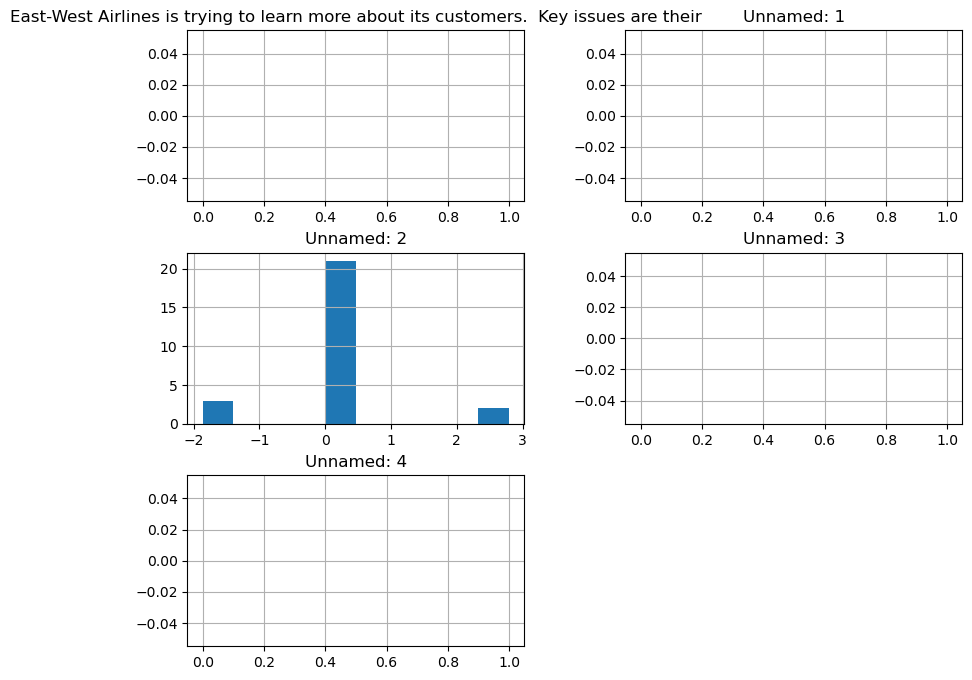

In [36]:
# Histograms of features
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_df.hist(figsize=(10, 8))
plt.show()

**Observation**
The first line converts the scaled data back into a DataFrame and assigns the original column names to it.
data_scaled_df.hist(figsize=(10, 8))': creates histogramand  for each column in the DataFrame the figsize=(10,8) parameter specifies the size of the figure for better readability
displays the histogram

**Scatter plot**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


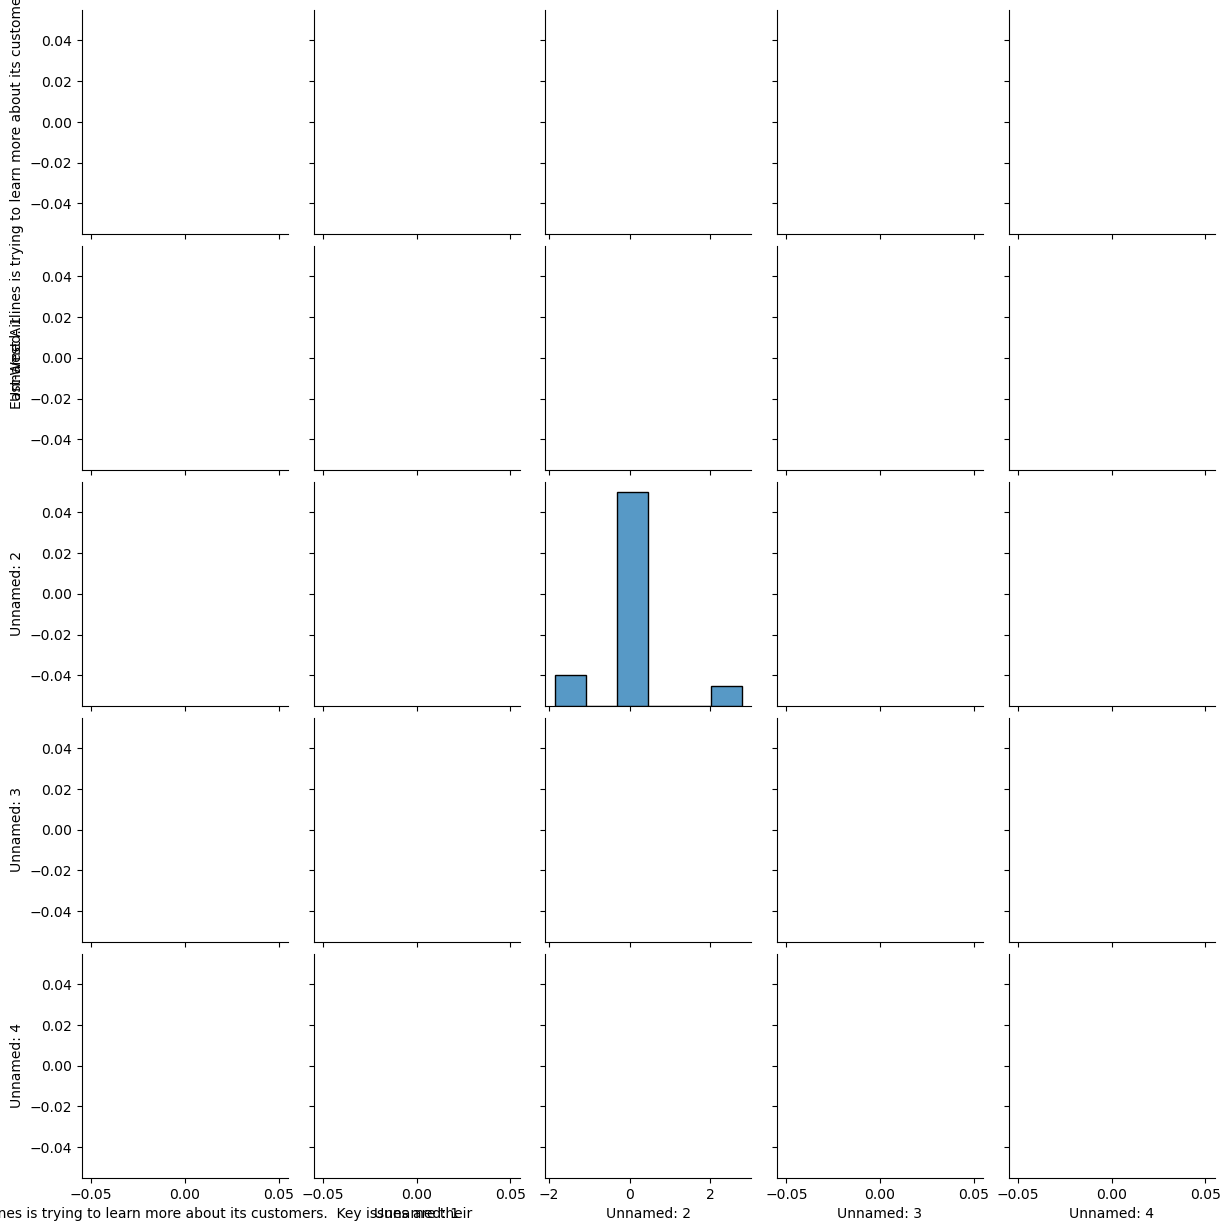

In [37]:
# Pairplot or scatter plots
sns.pairplot(data_scaled_df)
plt.show()


**Box plot**

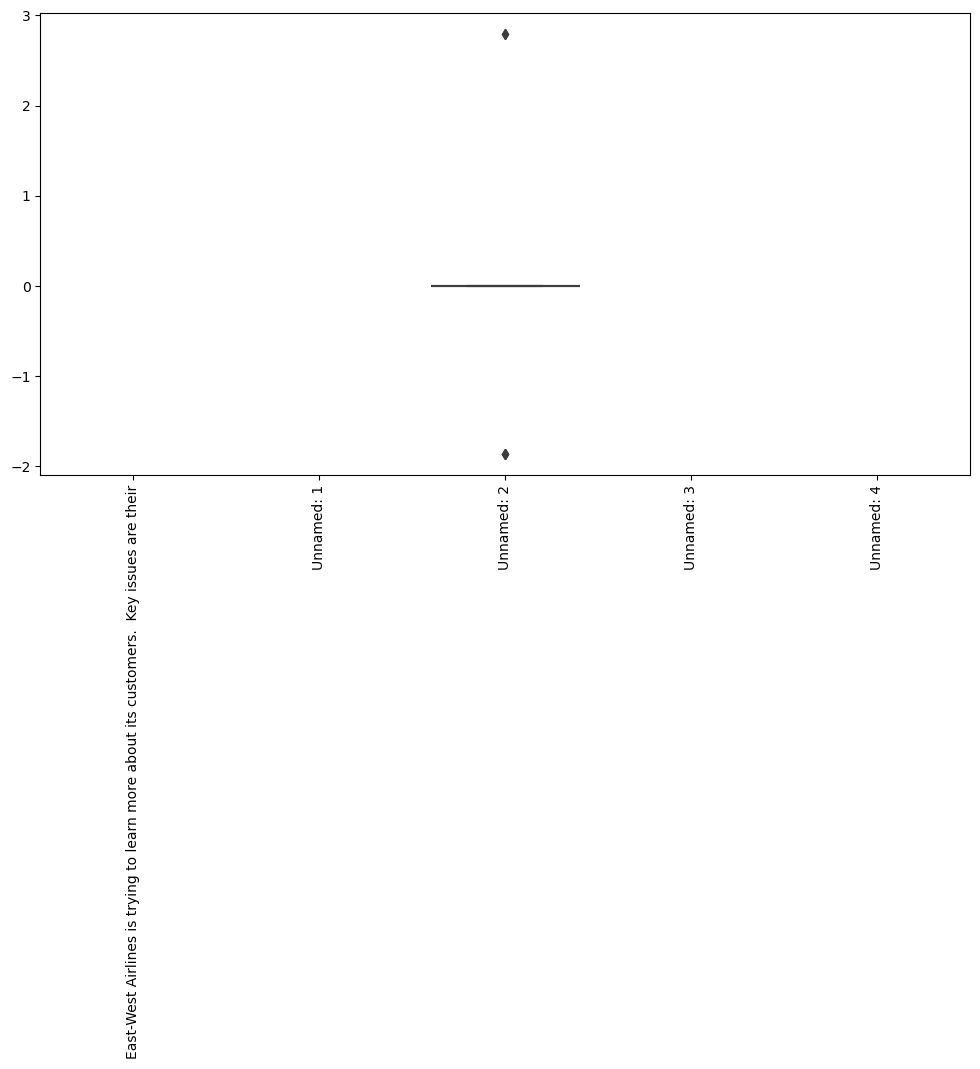

In [38]:
# Box plots for feature distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_scaled_df)
plt.xticks(rotation=90)
plt.show()

**Observation**
'plt.figure(figsize=(12,6))' sets the size of the figure to 12 inches wide by 6 inches tall which helps in making the plot more readable
'sna.boxplot(data=data_scaled_df)' using Seaborns boxplot function to create a boxplot for each column in the data frame this plot shows the median quartiles and any outliers in the data.
'plt.xticks(rotation=90)' Rotates the x-axis label by 90 degrees for better undersatnding .



In [39]:
# Check for NaN values in the scaled data
print("Missing values in scaled data:")
print(pd.DataFrame(data_scaled).isna().sum())

Missing values in scaled data:
0    26
1    26
2     0
3    26
4    26
dtype: int64


In [40]:
#Handling NaN values
from sklearn.impute import SimpleImputer


In [41]:
# Impute missing values in scaled data
imputer = SimpleImputer(strategy='mean')
data_scaled = imputer.fit_transform(data_scaled)

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data = pd.read_excel('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\EastWestAirlines.xlsx')
print(data)

   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0   flying patterns, earning and use of frequent f...                                      
1   card.  The task is to identify customer segmen...                                      
2                                                 NaN                                      
3                                                 NaN                                      
4   Source: Based upon real business data; company...                                      
5              (c) 2016 Galit Shmueli and Peter Bruce                                      
6                                                 NaN                                      
7                                                 NaN                                      
8                                          Field Name                                      
9                                                 ID#                           

In [43]:
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str)) 

In [44]:
# Handle missing values
data = data.fillna(data.mean())


In [45]:
# Apply Standard Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [46]:
# Convert scaled data to DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [47]:
# Print shapes and data types for verification
print("Data types after preprocessing:")
print(data.dtypes)
print("Shape of scaled data DataFrame:")
print(data_scaled_df.shape)
print(data_scaled_df.head())

Data types after preprocessing:
East-West Airlines is trying to learn more about its customers.  Key issues are their    int32
Unnamed: 1                                                                               int32
Unnamed: 2                                                                               int32
Unnamed: 3                                                                               int32
Unnamed: 4                                                                               int32
dtype: object
Shape of scaled data DataFrame:
(26, 5)
   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0                                           0.906374                                       
1                                           0.256285                                       
2                                           1.068896                                       
3                                           1.068896                   

**K-Means**

In [48]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Observation**
The first line creates an instance of the K-Means algorithm with 3 clusters. The random_state=0 parameter sees that the results are reproducible by setting a fixed seed for the random number generator
The second line fits the k-means model to the scaled data and predicts the cluster for each data point. The result is an array of cluster labels.

In [49]:
# Create DataFrame with scaled data and clusters
# Ensure correct column names if needed
data_scaled_df = pd.DataFrame(data_scaled, columns=[f'Feature {i+1}' for i in range(data_scaled.shape[1])])
data_scaled_df['Cluster'] = clusters

In [50]:
# Print shape and preview to verify
print("Shape of scaled data DataFrame:", data_scaled_df.shape)
print(data_scaled_df.head())

Shape of scaled data DataFrame: (26, 6)
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Cluster
0   0.906374   0.790569    0.51465    0.90007   1.068896        1
1   0.256285   0.790569    0.51465    0.90007   1.068896        1
2   1.068896   0.790569    0.51465    0.90007   1.068896        1
3   1.068896   0.790569    0.51465    0.90007   1.068896        1
4   0.093763   0.790569    0.51465    0.90007   1.068896        1


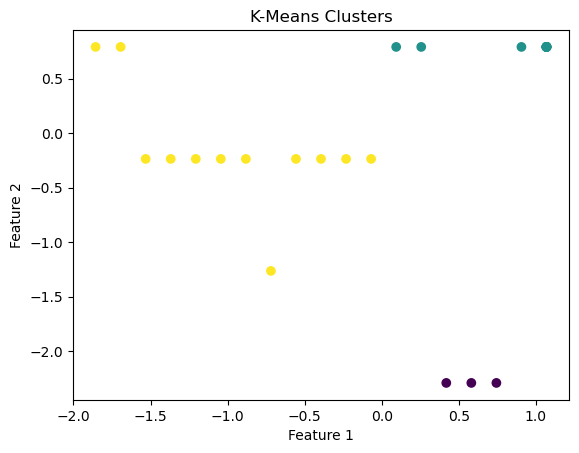

In [51]:
# Visualize clusters
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=data_scaled_df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clusters')
plt.show()


**Observation**
The first line creates a scatter plot of the first two features from the data frame
The color of each point represents its cluster assignment as determined by the k-means algorithm. The 'cmap=viridis' parameter sets the color map to 'Viridis' which is a color scheme for better visual distinction
adding labels and title-like labels on the x-axis as feature1
labels the y-axis as feature2
adds a title to the scatter plot indicating that it shows k-means clusters
So this helps in understanding how the data points are grouped into different clusters based on the features

**Hierarchical clustering**

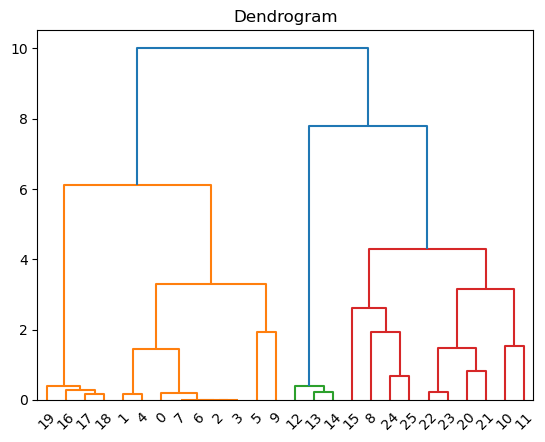

In [52]:
#Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
Z = linkage(data_scaled, 'ward')
dendrogram(Z)
plt.title('Dendrogram')
plt.show()


**Observation**
It performs hierarchical clustering on the scaled data and visualizes the results using a dendrogram 
the first line applies hierarchical clustering to the scaled data using the 'ward' method which minimizes the variance within clusters. The linkage function returns a linkage matrix 'Z' which contains the hierarchical clustering information.
dendogram(Z): it generates a dendrogram a tree-like diagram that shows the arrangement of the clusters and how they merge at various distances.and at last adds a title to the dendrogram plot and displays it.

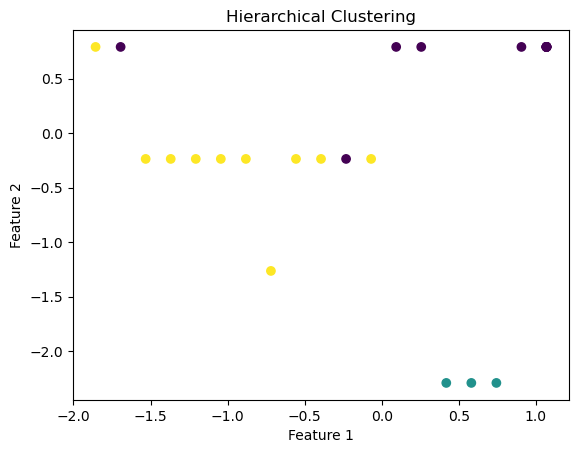

In [53]:
# Form clusters
clusters = fcluster(Z, t=3, criterion='maxclust')

# Add cluster labels to DataFrame
data_scaled_df['Cluster'] = clusters

# Visualize clusters
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=data_scaled_df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()

**Observation**
The first line assigns cluster labels it extracts cluster labels from the hierarchical clustering results in the 'fcluster' function groups the data into 't=3' clusters based on the maximum number of clusters criterion
The second line adds the cluster labels to the dataframe creating a new column called 'Cluster' to store the assigned cluster for each datapoint.
In visualize clusters the first line creates a scatter plot of the first two features from the 'data_scaled_df' dataframe. each point is colored according to its cluster assignment using the 'virids' color map.
adding label and titles like labels the x-axis as feature1, y-axis as feature2.
adding a title to the scatter plot indicating that it shows hierarchical clustering results. 
Displaying the scatter plot.





**DBSCAN**

In [55]:
#DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

**Observation**
This code applies the DBSCAN clustering algorithm to the scaled data to identify clusters.
the first line it creates a instance of the DBSCAN algorithm with 'eps=0.5' and 'min_samples=5'.The 'eps' parameters defined the maximum distance between two samples for one to be considered as in the neighborhood of the other and 'min_samples' specifies the minimum number of samples required to form a dense region
The last line it fits the DBSCAN model to the scaled data and predicts the cluster labels.The result is an array of cluster labels for each data point the point labels as -1 are considered as outliers

In [56]:
# Add cluster labels to DataFrame
data_scaled_df['Cluster'] = clusters

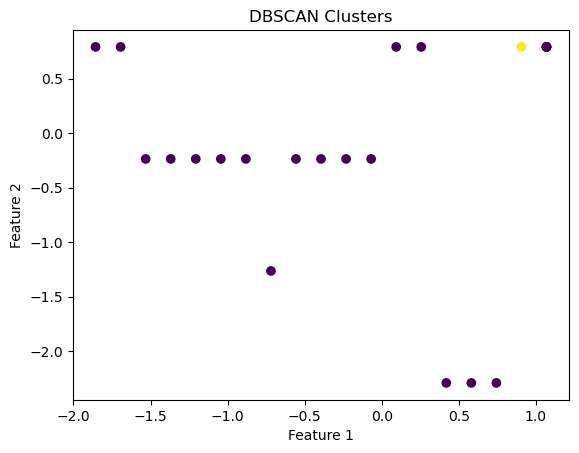

In [57]:
# Visualize clusters
plt.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=data_scaled_df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clusters')
plt.show()


**Observation**
The code creates a scatter plot to visualize the clusters identified by the DBSCAN algorithm.
The first line it generates a scatter plot of the first two features from the 'data_scaled_df' data frame. Each point is colored based on its cluster assignment  points labeled as -1 bt DBSCAN which represents outliers adding labels and titles like x-axis as feature1, y-axis as feature2 and to scatter plot indicating that it shows the result DBSCAN clustering

In [58]:
#Evaluating clustering quality
from sklearn.metrics import silhouette_score

In [59]:
# Compute silhouette score
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.19343926521450888


**Observation**
The code calculates and displays the silhouette score for the clustering results.
The first line computes the silhouette scored for the clusters obtained from the clustering algorithm. The Silhouette score measures how similar each sample is to its cluster compared to other clusters, A higher score indicates a better-defined cluster
and prints the calculated silhouette score to the console.